Standard vs nevh: simulation of single orbit of Halley's comet. Compare final angular momentum, final energy and perieliom distace  in both approaches. Eventually further information can be obtained comparing with analytical values for these quantities.

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
PI = np.pi
sys.path.append("../src")
import nevh

In [2]:
def rk4pl(t, y, dt, f, *params):
    k1 = f(t, y, *params)
    k2 = f(t + dt/2, y + k1 * dt/2, *params)
    k3 = f(t + dt/2, y + k2 * dt/2, *params)
    k4 = f(t + dt, y + k3 * dt, *params)
    return ((k1 + 2*k2+ 2*k3 + k4) * dt/6)

In [3]:
#1D harmonic oscilator
def f(t, y, w2):
    x, v = y
    return np.array([v, -w2*x])

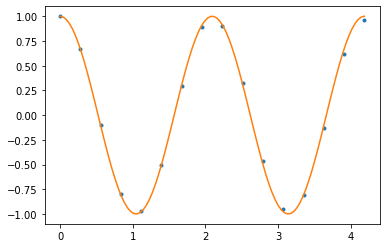

In [4]:
w = 3.0
w2 = w**2
n = 15
tmax = 2 * 2*PI/w
dt = tmax / n
t = np.linspace(0,tmax,n+1)
yn = np.zeros((n+1, 2))
x0 = 1.0; v0 = 0.0
yn[0] = (x0, v0)
for i,y in enumerate(yn[:-1]):
    yn[i+1] = y + rk4pl(i*dt, y, dt, f, w2)
A = x0; B = v0/w
tcont = np.linspace(0,tmax,100)
ycont = A*np.cos(w*tcont) + B * np.sin(w*tcont)
plt.plot(t,yn[:,0],'.',tcont,ycont);

### Central force: Kepler orbit

In [5]:
# rhs for eqs of motion (cartesian coordinates)
def fkep(t, Psi, GM):
    x, y, vx, vy = Psi
    r3 = (x**2 + y**2)**1.5
    return np.array([ vx, vy, -GM*x/r3, -GM*y/r3])

In [6]:
# Hamiltonian (cartesian coordinates)
def Hkep(t, psi, GM, mu):
    x, y, px, py = psi
    return (px**2 + py**2)/(2*mu) - GM*mu / (x**2 + y**2)**0.5

In [7]:
# Global physical parameters
GM = 39.426900 # AU^3/y^2
mu = 2.2       # 10^14 kg (Halley)
alpha = GM*mu

# Initial state (Halley's comet data)
xf = 35.082 #(apheliom)
xc = 0.586  #/periheliom
vf = (2*GM*(1/xc - 1/xf)/((xf/xc)**2-1))**0.5

# Angular momentum and energy
l = mu * xf * vf
E = mu * vf**2 / 2 - alpha / xf
# Eccentricity, semimajor axis
eps = (1 + 2*E*l**2/(mu*alpha**2))**0.5
a = (xc + xf) / 2
# Orbital period
T = (4*PI**2 * a**3/GM)**0.5

# Numerical parameters
N = 2500
dt = T / (N-1)
t = np.linspace(0, T, N)
# Standard approach
psi_s = np.zeros((N,4))
psi_s[0] = [xf, 0.0, 0.0, vf]
for i, psi in enumerate(psi_s[:-1]):
    psi_s[i+1] = psi + rk4pl(i*dt, psi, dt, fkep, GM)
    
# nevh
dq = np.array([0.05,0.05, 0.05,0.05])
gkep = nevh.Hgrad(Hkep, dq, GM=GM, mu=mu)
psi_n = np.zeros_like(psi_s)
psi_n[0] = [xf, 0.0, 0.0, mu*vf]
for i, psi in enumerate(psi_n[:-1]):
    psi_n[i+1] = psi + rk4pl(i*dt, psi, dt, gkep)

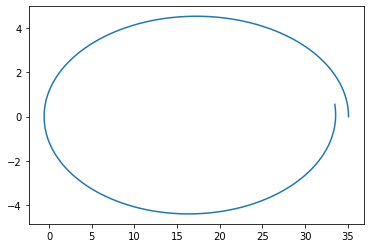

In [8]:
plt.plot(psi_n[:,0],psi_n[:,1]);

In [34]:
min([psi[0]**2+psi[1]**2 for psi in psi_n])**0.5

0.585940581555678

In [ ]:
# Again, but now for error plots
# Global physical parameters
GM = 39.426900 # AU^3/y^2
mu = 2.2       # 10^14 kg (Halley)
alpha = GM*mu

# Initial state (Halley's comet data)
xf = 35.082 #(apheliom)
xc = 0.586  #/periheliom
vf = (2*GM*(1/xc - 1/xf)/((xf/xc)**2-1))**0.5

# Angular momentum and energy
l = mu * xf * vf
E = mu * vf**2 / 2 - alpha / xf
# Eccentricity, semimajor axis
eps = (1 + 2*E*l**2/(mu*alpha**2))**0.5
a = (xc + xf) / 2
# Orbital period
T = (4*PI**2 * a**3/GM)**0.5

# Numerical parameters
N = 10000
dt = T / (N-1)
t = np.linspace(0, T, N)
# Standard approach
psi_s = np.zeros((N,4))
psi_s[0] = [xf, 0.0, 0.0, vf]
for i, psi in enumerate(psi_s[:-1]):
    psi_s[i+1] = psi + rk4pl(i*dt, psi, dt, fkep, GM)

x, y, px, py = psi_s[-1]
# final angular momentu, final energy, perielion
l_s = x*py - y*px
E_s = (px**2+ py**2)/(2*mu) - alpha / (x**2+y**2)**0.5
p_s = min([r[0]**2 + r[1]**2 for r in psi_s])**0.5

#nevh
psi_n = zeros_like(psi_s)